# DATA PROJECT - JPS

**Table of contents**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
- 2. [Import the needed data](#toc2_)    
- 3. [Read and clean the data](#toc3_)    
- 4. [Plotting the prices on houses and apartments](#toc4_)    
- 5. [Merging the data sets](#toc5_)
- 6. [Analysis](#toc6_)   
- 7. [Conclusion](#toc7_)  
 

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc1_)

In this project we analyse the development of the house and aparment prices in Denmark. We compare the prices and growth rate of houses and apartments in Copenhagen as well as the difference of the change in prices between counties in Denmark. 

## 1. <a id='toc2_'></a>[Importing the needed packages:](#toc2_)
We start by importing all of the needed packages to being able using the data properly

In [165]:
%pip install pandas-datareader
%pip install git+https://github.com/elben10/pydst
%pip install matplotlib-venn

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from scipy.stats.mstats import gmean

import pandas_datareader 
import pydst 

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# user written modules
import dataproject

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/elben10/pydst to /private/var/folders/5k/v848_lfn4c7fkwyhsjyv_0b40000gn/T/pip-req-build-zmlb_nu2
  Running command git clone --filter=blob:none --quiet https://github.com/elben10/pydst /private/var/folders/5k/v848_lfn4c7fkwyhsjyv_0b40000gn/T/pip-req-build-zmlb_nu2
  Resolved https://github.com/elben10/pydst to commit bb347560a1b3c17684fda072c829658da38f5a72
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc3_'></a>[Read and clean the data](#toc3_)

We start by importing the data about Apartments in Denmark from Statistikbanken and make a tabel of the data. 

In [166]:
# Loading the Data from statistikbanken
filename1 = 'Ejerlejligheder.xlsx'
pd.read_excel(filename1).head(5)



,"Ejendomssalg efter overdragelsesformer, nøgletal, ejendomskategori, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,Enhed: -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
2,Almindelig fri handel,Gennemsnitlig pris pr. ejendom (1000 kr),"Ejerlejligheder, i alt",Hele landet,421.0,419.0,452.0,474.0,514.0,536.0,...,1845.0,1945.0,2063.0,2156.0,2369.0,2470.0,2570.0,2800.0,3005.0,2847.0
3,NaN,NaN,NaN,Region Hovedstaden,446.0,443.0,482.0,502.0,538.0,557.0,...,2166.0,2236.0,2351.0,2511.0,2813.0,2958.0,3066.0,3351.0,3664.0,3520.0
4,NaN,NaN,NaN,Landsdel Byen København,421.0,417.0,453.0,475.0,510.0,529.0,...,2341.0,2411.0,2570.0,2798.0,3182.0,3355.0,3449.0,3730.0,4174.0,4026.0


Since the don't need all of the rows and columns we are deleting these. We remane a column, reset the index and converting the index from wide to long.

In [167]:
# Now we are dropping rows
ap = pd.read_excel(filename1, skiprows=2)

# Now we drop the first three columns
del ap['Unnamed: 0'], ap['Unnamed: 1'], ap['Unnamed: 2']

# Now we rename the variable 'Unnamed: 3' 
ap.rename(columns = {'Unnamed: 3':'County'},inplace=True)
col_dict = {}
for i in range(1992, 2022+1): # range goes from 2008 to but not including 2018
    col_dict[str(i)] = f'AP_price{i}' 
ap.rename(columns = col_dict, inplace=True)

# We are only interesetd in the Countys so we drop the regions and the whole country
I = ap.County.str.contains('Region')
I |= ap.County.str.contains('Hele landet')
ap.loc[I, :]
ap = ap.loc[I == False]

# We reset the index 
ap.reset_index(inplace = True, drop = True) # Drop old index too
ap.iloc[0:5,:]

# We convert the index from wide to long
ap_long = pd.wide_to_long(ap, stubnames='AP_price', i='County', j='Year')
ap_long.head(11)

,,AP_price
County,Year,
Landsdel Byen København,1992,421
Landsdel Københavns omegn,1992,474
Landsdel Nordsjælland,1992,504
Landsdel Bornholm,1992,377
Landsdel Østsjælland,1992,466
Landsdel Vest- og Sydsjælland,1992,338
Landsdel Fyn,1992,338
Landsdel Sydjylland,1992,374
Landsdel Østjylland,1992,434


The data for apartments in Denmark are cleaned and we can now use the index.
We Import the data for houses in Denmark as well and make the same changes as we did on the data for the apartments en Denmark

In [168]:
# Loading the Data from statistikbanken
filename2 = 'Familiehuse.xlsx'
pd.read_excel(filename2).head(5)

,"Ejendomssalg efter overdragelsesformer, nøgletal, ejendomskategori, område og tid",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,Enhed: -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
2,Almindelig fri handel,Gennemsnitlig pris pr. ejendom (1000 kr),Enfamiliehuse,Hele landet,551.0,565.0,622.0,656.0,753.0,806.0,...,1883.0,1955.0,2082.0,2122.0,2209.0,2257.0,2335.0,2477.0,2639.0,2464.0
3,NaN,NaN,NaN,Region Hovedstaden,777.0,789.0,876.0,935.0,1088.0,1195.0,...,2965.0,3075.0,3310.0,3465.0,3623.0,3754.0,3873.0,4231.0,4723.0,4471.0
4,NaN,NaN,NaN,Landsdel Byen København,767.0,785.0,856.0,917.0,1063.0,1169.0,...,3535.0,3775.0,4129.0,4441.0,4725.0,4938.0,5128.0,5708.0,6198.0,6146.0


In [169]:
# Now we are dropping rows
house = pd.read_excel(filename2, skiprows=2)

# Now we drop the first three columns
del house['Unnamed: 0'], house['Unnamed: 1'], house['Unnamed: 2']

# Now we rename the variable 'Unnamed: 3' 
house.rename(columns = {'Unnamed: 3':'County'},inplace=True)
col_dict = {}
for i in range(1992, 2022+1): # range goes from 2008 to but not including 2018
    col_dict[str(i)] = f'House_price{i}' 
house.rename(columns = col_dict, inplace=True)

# We are only interesetd in the Countys so we drop the regions and the whole country
J = house.County.str.contains('Region')
J |= house.County.str.contains('Hele landet')
house.loc[I, :]
house = house.loc[I == False]

# We reset the index 
house.reset_index(inplace = True, drop = True) # Drop old index too
house.iloc[0:5,:]

# We convert the index from wide to long
house_long = pd.wide_to_long(house, stubnames='House_price', i='County', j='Year')
house_long.head(11)

,,House_price
County,Year,
Landsdel Byen København,1992,767
Landsdel Københavns omegn,1992,836
Landsdel Nordsjælland,1992,797
Landsdel Bornholm,1992,335
Landsdel Østsjælland,1992,704
Landsdel Vest- og Sydsjælland,1992,445
Landsdel Fyn,1992,470
Landsdel Sydjylland,1992,494
Landsdel Østjylland,1992,557


In [ ]:
filename3= 'Rentesats.xlsx'
pd.read_excel(filename3).head(5)

In [170]:
# Now we are dropping rows
rent = pd.read_excel(filename3, skiprows=2)

rent = rent.drop(labels=[1,2],axis=0)

# Now we drop the first three columns
del rent['Unnamed: 0'], rent['Unnamed: 1'], rent['Unnamed: 2']

# Now we rename the variable 'Unnamed: 3' 
rent.rename(columns = {'Unnamed: 3':'Rentesats'},inplace=True)
col_dict = {}
for i in range(2014, 2023+1): # range goes from 2008 to but not including 2018
    col_dict[str(i)] = f'Rente_price{i}' 
rent.rename(columns = col_dict, inplace=True)
rent.head(5)
rename = [cname[0:4]for cname in rent.columns]
rent.columns = rename
rent.head(5)

rent.rename(columns={'0':'Year'},inplace=True)
rent.head(5)


# We reset the index 
rent.reset_index(inplace = True, drop = True) # Drop old index too
rent.iloc[0:5,:]
rent.head(5)

rent_data = {'Year':[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023],
             'Rentesats':[1.504,1.401,1.318,1.246,1.226,1.189,1.097,0.953,0.87,3.386]}

rent = pd.DataFrame(rent_data,columns=['Year','Rentesats'])

rent.head(5)




,Year,Rentesats
0,2014,1.504
1,2015,1.401
2,2016,1.318
3,2017,1.246
4,2018,1.226


## 1. <a id='toc4_'></a>[Plotting the prices on houses and apartments](#toc4_)

We are plotting the prices on apartments in diifferent counties in Denmark to compare the development.

,County,Year,AP_price,Growth_Rate,Gmean,D_Gmean
1,Landsdel Københavns omegn,1992,474,12.589074,0.41992,12.169154
2,Landsdel Nordsjælland,1992,504,6.329114,0.41992,5.909194
3,Landsdel Bornholm,1992,377,-25.198413,0.41992,-25.618333
4,Landsdel Østsjælland,1992,466,23.607427,0.41992,23.187507
5,Landsdel Vest- og Sydsjælland,1992,338,-27.467811,0.41992,-27.887731


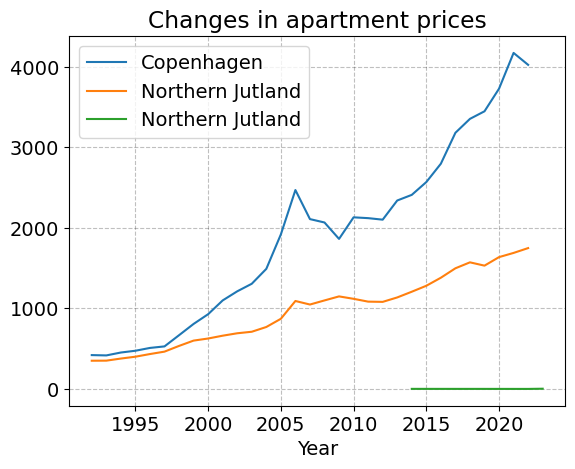

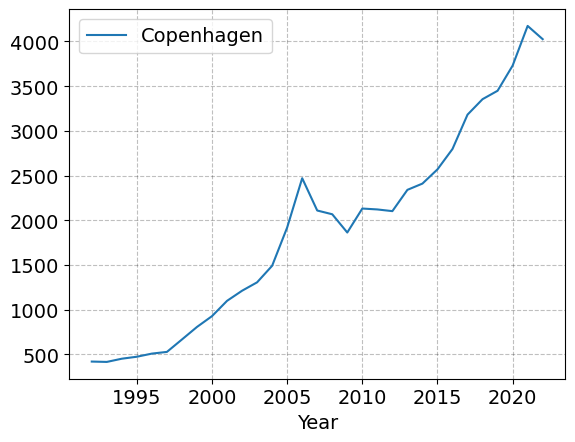

In [199]:
# Data with Copenhagen Apartments
ap_long_2 = ap_long.reset_index()
ap_long_2.loc[ap_long_2.County == 'Landsdel Byen København', :] 
ap_københavn = ap_long_2.loc[ap_long_2['County'] == 'Landsdel Byen København', :]

# Data with Copenhagen Houses
house_long_2 = house_long.reset_index()
house_long_2.loc[house_long_2.County == 'Landsdel Byen København', :]
house_københavn = house_long_2.loc[house_long_2['County'] == 'Landsdel Byen København', :]

# Data with Northen Jutland Houses
house_long_3 = house_long.reset_index()
house_long_3.loc[house_long_3.County == 'Landsdel Nordjylland', :]
house_nordjylland = house_long_3.loc[house_long_3['County'] == 'Landsdel Nordjylland', :]

# Data with Northen Jutland apartments
ap_long_3 = ap_long.reset_index()
ap_long_3.loc[ap_long_3.County == 'Landsdel Nordjylland', :] 
ap_nordjylland = ap_long_3.loc[ap_long_3['County'] == 'Landsdel Nordjylland', :]

# Plotting
ax = ap_københavn.plot(x='Year', y='AP_price', label = 'Copenhagen')
ap_nordjylland.plot(x='Year', y='AP_price', label= 'Northern Jutland', title="Changes in apartment prices", ax=ax)


ac = ap_københavn.plot(x='Year', y='AP_price', label = 'Copenhagen')
rent.plot(x='Year', y='Rentesats', label= 'Northern Jutland', title="Changes in apartment prices", ax=ax)


ap_long_4.head(5)



 In 1990 the prices was almost the same where the prices for apartments in Copenhagen have been rising exponentially.  The financial crisis can easly be seen on the line for Copenhagen, where the line for Nortern Jutland have been more stable over time
One factor overall that has contributed to the rise in house prices in the recent years, is the low interest rate. This has made it more affordable to take out mortages and purchase homes. 


Interactive plot showing the development of the prices on houses an apartments in the different counties in Denmark.

In [172]:
# defiition of the plot function
def plot_func(df, County):
    # Function that operates on data set
    I = df['County'] == County
    ax=df.loc[I,:].plot(x='Year', y='House_price', style='-o', legend=False, title="Changes in house prices")
 # setting the interactive widget
widgets.interact(plot_func, 
    df = widgets.fixed(house_long_2),
    County = widgets.Dropdown(description='County', 
                                    options=house_long_2.County.unique(), 
                                    value='Landsdel Byen København')
);

# defiition of the plot function
def plot_func(df, County):
    # Function that operates on data set
    I = df['County'] == County
    ax=df.loc[I,:].plot(x='Year', y='AP_price', style='-o', legend=False, title="Changes in apartment prices")
 # setting the interactive widget
widgets.interact(plot_func, 
    df = widgets.fixed(ap_long_3),
    County = widgets.Dropdown(description='County', 
                                    options=ap_long_3.County.unique(), 
                                    value='Landsdel Byen København')
);


interactive(children=(Dropdown(description='County', options=('Landsdel Byen København', 'Landsdel Københavns …

interactive(children=(Dropdown(description='County', options=('Landsdel Byen København', 'Landsdel Københavns …

Both the change in house prices and apartment prices has been more volatile in the big cities in the Denmark compared to the small cities. The financial crisis has made a bigger decrease on the house and apartment prices in Copenhagen than in the less counties in Denmark that has a smaller population. 

## 5. <a id='toc5_'></a>[Merging the data sets](#toc5_)

We merge the data for the apartment and the house prices to compare the development for the Growth rate.

In [173]:
# We make a left join merge 
join = pd.merge(house, ap, on='County', how='left')
join.head(10)


,County,House_price1992,House_price1993,House_price1994,House_price1995,House_price1996,House_price1997,House_price1998,House_price1999,House_price2000,...,AP_price2013,AP_price2014,AP_price2015,AP_price2016,AP_price2017,AP_price2018,AP_price2019,AP_price2020,AP_price2021,AP_price2022
0,Landsdel Byen København,767,785,856,917,1063,1169,1376,1539,1731,...,2341,2411,2570,2798,3182,3355,3449,3730,4174,4026
1,Landsdel Københavns omegn,836,844,955,1029,1204,1321,1472,1628,1784,...,1761,1812,1846,1947,2112,2229,2389,2556,2747,2686
2,Landsdel Nordsjælland,797,810,901,965,1126,1226,1373,1536,1674,...,1690,1748,1834,1782,1964,2128,2112,2307,2521,2439
3,Landsdel Bornholm,335,341,368,388,434,453,475,496,531,...,607,679,700,875,898,657,809,895,1274,948
4,Landsdel Østsjælland,704,716,813,879,1013,1106,1240,1338,1467,...,1406,1387,1582,1723,1787,1938,2093,2302,2495,2383
5,Landsdel Vest- og Sydsjælland,445,457,490,517,567,616,675,732,795,...,906,958,999,1058,1076,1087,1133,1179,1268,1259
6,Landsdel Fyn,470,477,523,555,639,686,785,816,860,...,1149,1198,1354,1340,1438,1585,1651,1750,1757,1770
7,Landsdel Sydjylland,494,508,559,583,664,704,754,810,852,...,1089,1083,1191,1177,1231,1366,1450,1407,1546,1506
8,Landsdel Østjylland,557,564,626,662,774,820,910,971,1035,...,1582,1690,1791,1825,1973,2017,2145,2272,2476,2363
9,Landsdel Vestjylland,471,483,530,558,617,646,699,737,767,...,1069,1017,1065,1047,1127,1152,1168,1137,1259,1221


In [174]:
# We change the table from wide to long and merge the columns
join_long = join.melt(id_vars=['County'], var_name = 'Year', value_name='Price')
join_long['Type'] = join_long['Year'].str[:-4]
join_long['Year'] = join_long['Year'].str[-4:]
join_long['County'] = join_long['County'].str.slice(start=9)
join_long.sort_values(['Year', 'County'], ignore_index=True)


,County,Year,Price,Type
0,Bornholm,1992,335,House_price
1,Bornholm,1992,377,AP_price
2,Byen København,1992,767,House_price
3,Byen København,1992,421,AP_price
4,Fyn,1992,470,House_price
...,...,...,...,...
677,Vestjylland,2022,1221,AP_price
678,Østjylland,2022,2655,House_price
679,Østjylland,2022,2363,AP_price
680,Østsjælland,2022,3684,House_price


Now the table is merged with both prices for houses and apartments for all counties in Denmark 

## 6. <a id='toc6_'></a>[Analysis](#toc6_)

In the analysis we are comparing the growth rate and the geometric mean in house and apartment prices in Copenhagen and Norhern Jutland.

We start by calculating the growth rate and the Gmean for houses and apartments in Copenhagen and Northern jutland.

In [236]:
# We calculate the growthrate and the geometric mean for houses in Copenhagen
house_københavn['Growth_Rate'] = (house_københavn['House_price'].pct_change(periods=1) * 100)
house_københavn2 = house_københavn.tail(-1)
gm1 = (gmean(house_københavn2['Growth_Rate'] / 100 + 1)-1)*100
print ("%.2f" % gm1)
house_københavn2['Gmean'] = gm1
house_københavn2['D_Gmean'] = house_københavn2.Growth_Rate - house_københavn2.Gmean


# We calculate the growthrate and the geometric mean in Houses in Northern Jutland
house_nordjylland['Growth_Rate'] = (house_nordjylland['House_price'].pct_change(periods=1) * 100)
house_nordjylland2 = house_nordjylland.tail(-1)
gm1 = (gmean(house_nordjylland2['Growth_Rate'] / 100 + 1)-1)*100
print ("%.2f" % gm1)
house_nordjylland2['Gmean'] = gm1
house_nordjylland2['D_Gmean'] = house_nordjylland2.Growth_Rate - house_nordjylland2.Gmean



# We calculate the growthrate and the geometric mean for apartments in Copenhagen
ap_københavn['Growth_Rate'] = (ap_københavn['AP_price'].pct_change(periods=1) * 100)
ap_københavn2 = ap_københavn.tail(-1)
gm2 = (gmean(ap_københavn2['Growth_Rate'] / 100 + 1)-1)*100
print ("%.2f" % gm2)
ap_københavn2['Gmean'] = gm2
ap_københavn2['D_Gmean'] = ap_københavn2.Growth_Rate - ap_københavn2.Gmean



# We calculate the growthrate and the geometric mean for apartments in Northern Jutland
ap_nordjylland['Growth_Rate'] = (ap_nordjylland['AP_price'].pct_change(periods=1) * 100)
ap_nordjylland2 = ap_nordjylland.tail(-1)
gm2 = (gmean(ap_nordjylland2['Growth_Rate'] / 100 + 1)-1)*100
print ("%.2f" % gm2)
ap_nordjylland2['Gmean'] = gm2
ap_nordjylland2['D_Gmean'] = ap_nordjylland2.Growth_Rate - ap_nordjylland2.Gmean




# We drop the NaN value from the dataset 
ap_københavn2 = ap_københavn2.dropna()
ap_københavn2.head(10)


/var/folders/5k/v848_lfn4c7fkwyhsjyv_0b40000gn/T/ipykernel_69423/101867785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_københavn['Growth_Rate'] = (house_københavn['House_price'].pct_change(periods=1) * 100)
/var/folders/5k/v848_lfn4c7fkwyhsjyv_0b40000gn/T/ipykernel_69423/101867785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_københavn2['Gmean'] = gm1


7.18
4.55
7.82
5.50


/var/folders/5k/v848_lfn4c7fkwyhsjyv_0b40000gn/T/ipykernel_69423/101867785.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_københavn2['D_Gmean'] = house_københavn2.Growth_Rate - house_københavn2.Gmean
/var/folders/5k/v848_lfn4c7fkwyhsjyv_0b40000gn/T/ipykernel_69423/101867785.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_nordjylland['Growth_Rate'] = (house_nordjylland['House_price'].pct_change(periods=1) * 100)
/var/folders/5k/v848_lfn4c7fkwyhsjyv_0b40000gn/T/ipykernel_69423/101867785.

,County,Year,AP_price,Growth_Rate,Gmean,D_Gmean
11,Landsdel Byen København,1993,417,-0.950119,7.816788,-8.766907
22,Landsdel Byen København,1994,453,8.633094,7.816788,0.816306
33,Landsdel Byen København,1995,475,4.856512,7.816788,-2.960276
44,Landsdel Byen København,1996,510,7.368421,7.816788,-0.448367
55,Landsdel Byen København,1997,529,3.725490,7.816788,-4.091298
66,Landsdel Byen København,1998,668,26.275992,7.816788,18.459205
77,Landsdel Byen København,1999,808,20.958084,7.816788,13.141296
88,Landsdel Byen København,2000,929,14.975248,7.816788,7.158460
99,Landsdel Byen København,2001,1100,18.406889,7.816788,10.590101
110,Landsdel Byen København,2002,1213,10.272727,7.816788,2.455939


We are plotting growth rate and the geometric mean of the houses and apartments in Copenhagen and Northern Jutland

<AxesSubplot:title={'center':'Growth rate, Northern Jutland'}, xlabel='Year'>

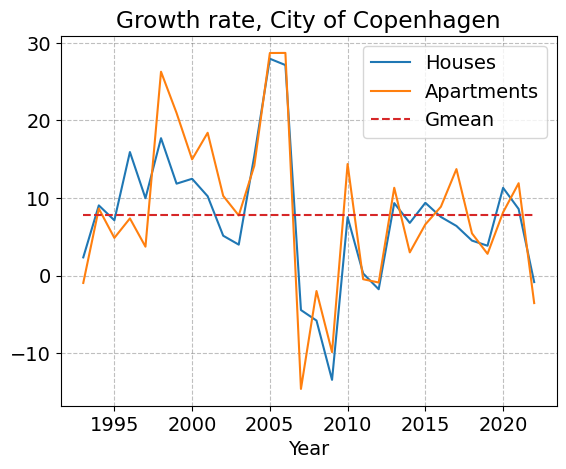

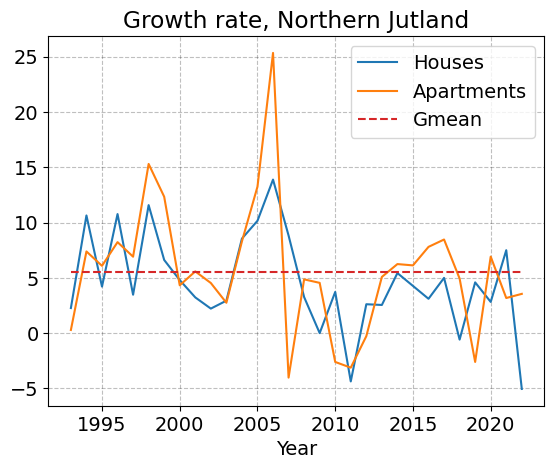

In [240]:

# Plotting growth rate and the geometric mean
ax = house_københavn2.plot(x='Year', y='Growth_Rate', label = 'Houses')
ax = ap_københavn2.plot(x='Year', y='Growth_Rate', label = 'Apartments', ax=ax)
ap_københavn2.plot(x='Year', y='Gmean', color='tab:red', linestyle='--', label='Gmean', title='Growth rate, City of Copenhagen', ax=ax)

ax = house_nordjylland2.plot(x='Year', y='Growth_Rate', label = 'Houses')
ax = ap_nordjylland2.plot(x='Year', y='Growth_Rate', label = 'Apartments', ax=ax)
ap_nordjylland2.plot(x='Year', y='Gmean', color='tab:red', linestyle='--', label='Gmean', title='Growth rate, Northern Jutland', ax=ax)


Comparing the growth rate in Copenhagen and Northern Jutland, The Gmean is higher in Copenhagen and the market for apartments are more volatile in the big city of Copenhagen. We can se that both of the counties has fluctuation about the times of economics crisis

## 7. <a id='toc6_'></a>[Conclusion](#toc7_)

In this project we have plotted the house prices, the growth rate and the geometric mean. 
It has been shows that there has been an significant increase in the house prices especially in Copenhagen. It has also been shown that the crisis in 2008 made a fluctuation in the prices, which had the biggest effect in the capital, Copenhagen, and overall the capitals seems to have more volatile prices for apartments and houses comparing to parts of Denmark with a smaller population.